In [20]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA
import scipy.cluster.hierarchy as hc
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data 
target = iris.target
names = iris.target_names
df = pd.DataFrame(X, columns=iris.feature_names)
df


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [22]:

df['species'] =target
df['species']

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: species, Length: 150, dtype: int32

In [ ]:
df['species'] = df['species'].replace(to_replace= [0, 1, 2], value = ['setosa', 'versicolor', 'virginica'])

In [23]:
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df)
df_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00, -1.22474487e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00, -1.22474487e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00, -1.22474487e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00

In [26]:
df_normalized = normalize(df_scaled)

In [28]:
df_normalized

array([[-3.43476414e-01,  3.88599176e-01, -5.11097840e-01,
        -5.01647091e-01, -4.67058699e-01],
       [-4.53574315e-01, -5.23723677e-02, -5.31831440e-01,
        -5.21997304e-01, -4.86005772e-01],
       [-5.15959513e-01,  1.22314239e-01, -5.20321260e-01,
        -4.89922907e-01, -4.56142894e-01],
       [-5.63141684e-01,  3.67139030e-02, -4.79734519e-01,
        -4.91716843e-01, -4.57813139e-01],
       [-3.69903172e-01,  4.52203248e-01, -4.85153895e-01,
        -4.76182878e-01, -4.43350235e-01],
       [-1.89605227e-01,  6.84679742e-01, -4.12868951e-01,
        -3.71383374e-01, -4.32292872e-01],
       [-5.46852489e-01,  2.86329582e-01, -4.86489365e-01,
        -4.29712433e-01, -4.44570633e-01],
       [-3.99456298e-01,  3.08356856e-01, -5.01696276e-01,
        -5.14227138e-01, -4.78771357e-01],
       [-6.10122087e-01, -1.26352137e-01, -4.67563757e-01,
        -4.58918000e-01, -4.27275764e-01],
       [-4.46366622e-01,  3.83554418e-02, -5.01184236e-01,
        -5.65106809e-01

In [30]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_normalized)
df_pca = pd.DataFrame(df_pca)
df_pca
df_pca.columns = ['P1', 'P2', 'P3']
df_pca

,P1,P2,P3
0,1.112099,-0.241380,-0.021598
1,1.076649,0.205483,-0.089997
2,1.112973,0.070238,0.036464
3,1.092083,0.167668,0.046619
4,1.102694,-0.290430,0.038972
...,...,...,...
145,-0.830628,-0.281316,0.129156
146,-0.776385,0.295095,0.051605
147,-0.838140,-0.246645,0.168501
148,-0.645486,-0.535224,0.456152


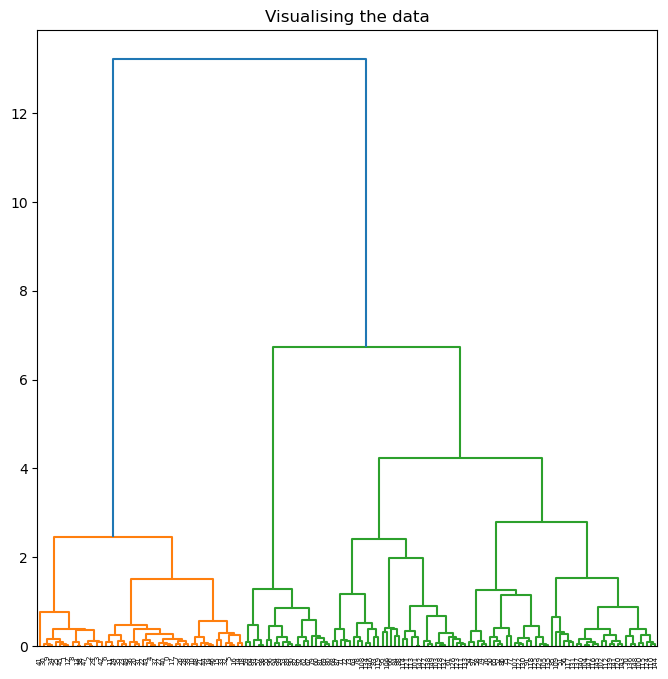

In [32]:
 #Create the Dendogram plot
plt.figure(figsize =(8, 8))
plt.title('Visualising the data')
dendrogram = hc.dendrogram((hc.linkage(df_pca, method ='ward')))


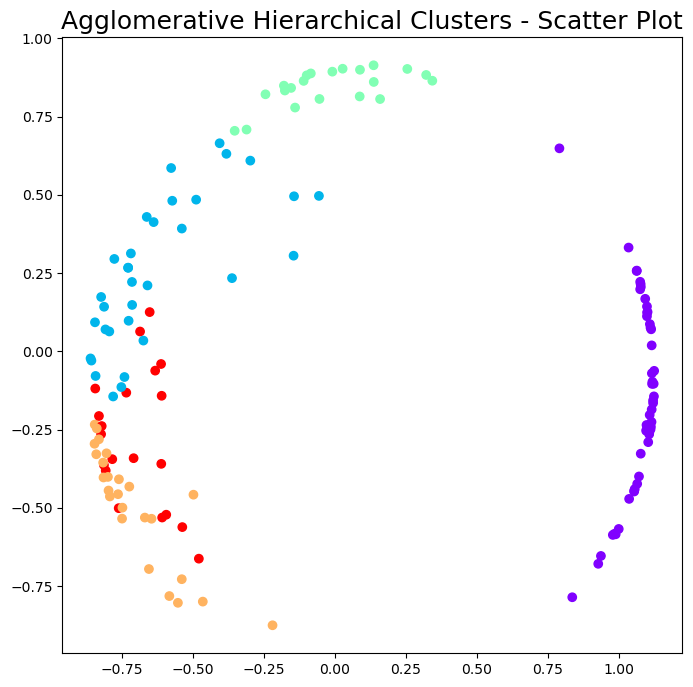

In [33]:
agc = AgglomerativeClustering(n_clusters = 5)
plt.figure(figsize =(8, 8))
plt.scatter(df_pca['P1'], df_pca['P2'], c = agc.fit_predict(df_pca), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

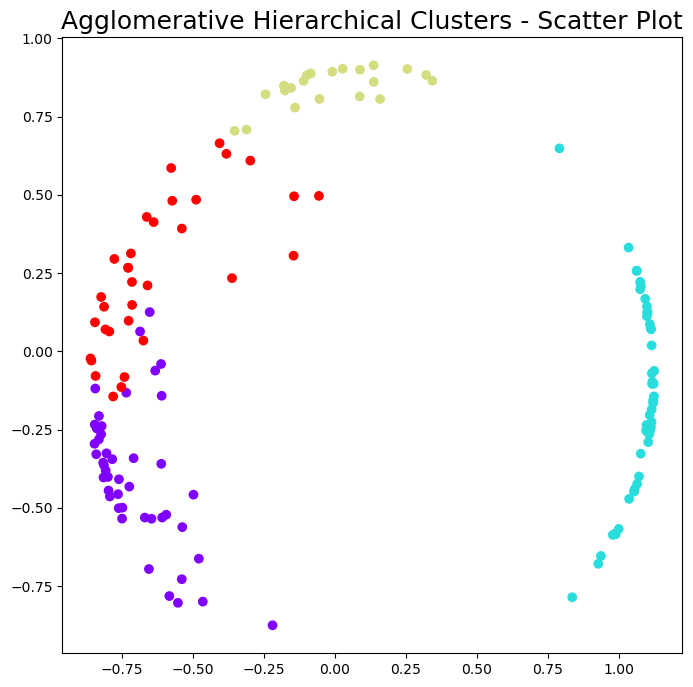

In [40]:
agc = AgglomerativeClustering(n_clusters = 4)
plt.figure(figsize =(8, 8))
plt.scatter(df_pca['P1'], df_pca['P2'], c = agc.fit_predict(df_pca), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

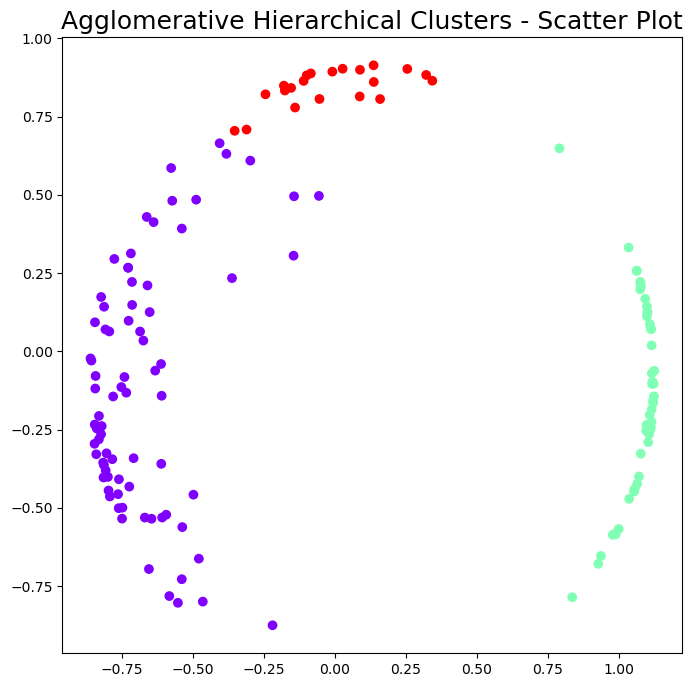

In [35]:
agc = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(8, 8))
plt.scatter(df_pca['P1'], df_pca['P2'], c = agc.fit_predict(df_pca), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

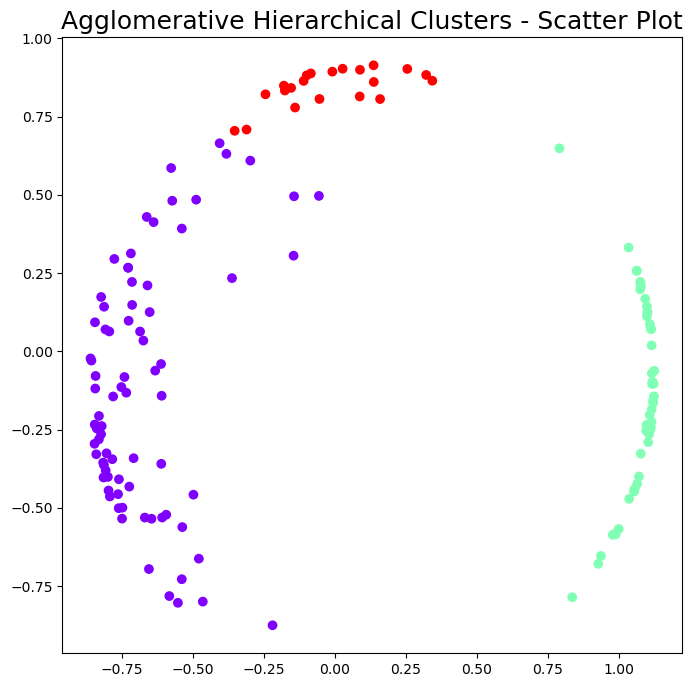

In [36]:
agc = AgglomerativeClustering(n_clusters = 3)
plt.figure(figsize =(8, 8))
plt.scatter(df_pca['P1'], df_pca['P2'], c = agc.fit_predict(df_pca), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

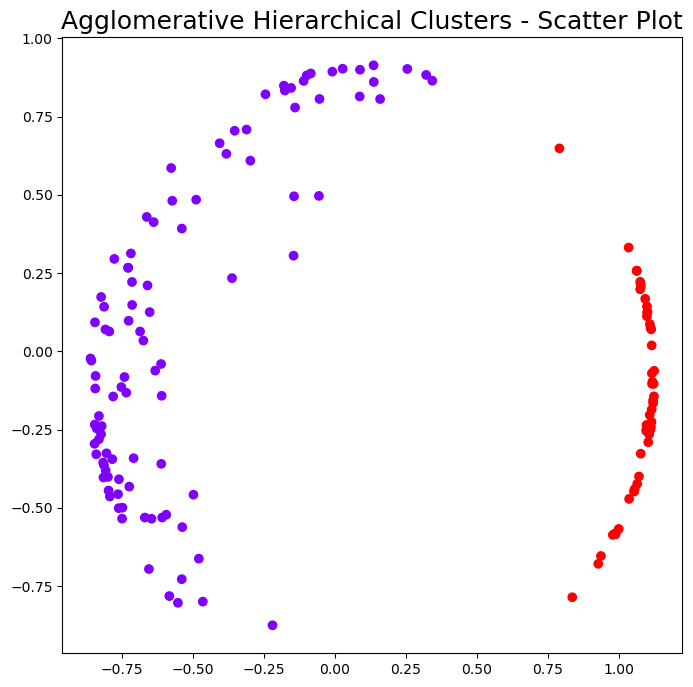

In [37]:
agc = AgglomerativeClustering(n_clusters = 2)
plt.figure(figsize =(8, 8))
plt.scatter(df_pca['P1'], df_pca['P2'], c = agc.fit_predict(df_pca), cmap ='rainbow')
plt.title("Agglomerative Hierarchical Clusters - Scatter Plot", fontsize=18)
plt.show()

In [38]:
agc.fit_predict(df_pca)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)